# Week three

## Part 1: Small world networks

- ** What's the problem with random networks as a model for real-world networks according to the argument on p. 11-12 in the .pdf (near the end of section 3.5 for those of you reading the web-version)? **
    - The poission form significantly underestimate the number of high degree nodes. The spread in the degrees of rela networks is much wider than expected in a random network. The degree distribution of random networks lack clear outliers and in a large random network the degree of most nodes is in the narrow vicinity of <k>

- ** List the four regimes that characterize random networks as a function of ⟨k⟩⟨k⟩. *
    - *Subcritical Regime* p < 1/N. In the subcritical regime the network consists of numerous tiny components, whose size follows the exponential distribution. Hence these components have comparable sizes, lacking a clear winner that we could designate as a giant component
    - *Critical point: * p = 1/N. The critical point separates the regime where there is not yet a giant component (<k> < 1) from the regime where ther is one (<k> > 1) .At the critical point most nodes are located in numerous small components, whose size distribution follows 3.36. The power law form indicates that components of rather different sizes coexist. Thes numerous small components are mainly trees, while the giant component may contain loops. 
    - *Supercritical point* p > 1/N .This regime is most relevance to real systems, as for the first time we have a giant component that looks like a network. In the supercritical regime numerous isolated components coexist with the giant component, their size distribution following 3.35. These small components are tress, while the giant component contains loops and cycles. The supercritical regime lasts until all nodes are absorbed by the giant component. 
    - *Connected regime :* p > ln N / N. For sufficiently large p the giant component absorbs all nodes and components, hence N_G = N. In the absence of isolated nodes the network becomes connected. Here the average degree is <k> = lnN.  The random network model predicts that the emergence  of a network is not a smooth, gradual process. The isolated nodes and tiny components observed for small <k> collapse into a giant component through a phase transition.
    - *Notes:* Once <k> exceeds a critical value, N_G/N increases, signaling the rapid emergence of a large cluster t>hat we call the giant component. We have giant component if and only if each node has on average more than one link <k>. P_c = 1/N therefore the larger a network, the smaller p is sufficient for the giant component. 
   

- **According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?** 
    - Because in a random network the local clustering coefficient is independent on the node´s degree and <C> only depends on the system size as 1/N . 

### Exercise Ws edition 

In [73]:
# let´s create the graph
import networkx as nx
import matplotlib.pyplot as plt
from __future__ import division

n = 500
k = 4

G_nx1 = nx.watts_strogatz_graph(n,k,0)
G_nx2 = nx.watts_strogatz_graph(n,k,0.1)
G_nx3 = nx.watts_strogatz_graph(n,k,0.5)
G_nx4 = nx.watts_strogatz_graph(n,k,1)
G_nx5 = nx.watts_strogatz_graph(n,k,2)

G_random = nx.erdos_renyi_graph(500,1)

print("The average shortest path with rewiring probability of {} is {}".format(0,nx.average_shortest_path_length(G_nx1)))
print("The average shortest path with rewiring probability of {} is {}".format(0.1,nx.average_shortest_path_length(G_nx2)))
print("The average shortest path with rewiring probability of {} is {}".format(0.5,nx.average_shortest_path_length(G_nx3)))
print("The average shortest path with rewiring probability of {} is {}".format(1,nx.average_shortest_path_length(G_nx4)))
print("The average shortest path with rewiring probability of {} is {}".format(2,nx.average_shortest_path_length(G_nx4)))


The average shortest path with rewiring probability of 0 is 62.875751503
The average shortest path with rewiring probability of 0.1 is 7.6599759519
The average shortest path with rewiring probability of 0.5 is 5.02698997996
The average shortest path with rewiring probability of 1 is 4.76836873747
The average shortest path with rewiring probability of 2 is 4.76836873747


**Describe what happens to the network when p=1.**
    - One of the characteristic of a random network model is that it contains low average path lenght, meaning that there tends to be a path between a pair of nodes that involves only a few edges. This is called the small world problem and the average distance in such a network can be described by the following formula <d> = ln(N)/ln(k), where k is the average degree of the network and N is the number of nodes in the network. In a Watts storgatz p stands for the probability that an edge is rewired, meaning that the edge is disconnected from one of its nodes and randomly connected to another node anywhere in the network. Each edge is chosen to be rewired independent with probability p. 
    
    So when the probability is low then most connections are still in the original form, therefore they connect to the original local connections, they connect nodes that are nearby in the lattice. But some of the rewired edges might turn into long distance connections that connects nodes that are far away from each other, therefore lowering the average path length. These paths are called shortcuts and they lower the overall average path lenght of the network, so when P increases more and more rewiring happens. When P = 1 then all of the edges are rewired and we end up with a random network. Like we have mentioned earlier one of the characteristic of randum network is that the average path length can be described with this formula <d> = ln(N)/ln<k>. Calculating this for our network of N = 500 and k = 4 gives the average distance of 4.483. Like you can see here above the average shortest path decreases with increasing p and when p = 1 then the average distance is quite close to the theoretical value for a random network.
    
    info taken from this website [here](http://mathinsight.org/small_world_network)

### The behavior investigation

Let's investigate this behavior in detail. Generate 50 networks with N=500N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [79]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

N = 500
k = 4
p_values = [0,0.01,0.03,0.05,0.1,0.2]

networks = collections.defaultdict(list)
avgs = collections.defaultdict(float)
stds = collections.defaultdict(float)

# creating a list that contains 50 networks for each p
# calculating the average distance for each network
# calculatin the std of the average distance 
for i,p in enumerate(p_values):
    # Use list comprehension to create 50 instances of the network
    networks[i] = [nx.watts_strogatz_graph(n,k,p) for j in range(50)]
    average_d = [nx.average_shortest_path_length(network) for network in networks[i]]
    avgs[i] = np.mean(average_d) 
    stds[i] = np.std(average_d)

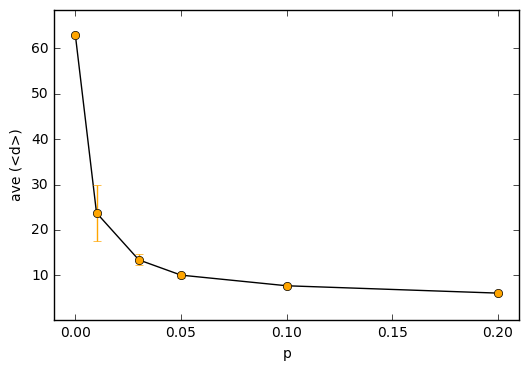

In [101]:
plt.figure()
plt.plot(p_values, avgs.values(),color="black")
plt.errorbar(p_values, avgs.values(), xerr=0, yerr=stds.values(), fmt="o", color="orange")
plt.ylabel('ave (<d>)')
plt.xlabel('p')
plt.margins(0.05,0.10)
plt.show()

In [88]:
stds.values()

[7.1054273576010019e-15,
 6.1847215088314256,
 1.2240545878422089,
 0.5758223495521706,
 0.26078195646092678,
 0.11959097197376481]

In [89]:
avgs.values()

[62.875751503006022,
 23.76124184368738,
 13.417167454909821,
 10.050843286573148,
 7.7097567935871743,
 6.0895017234468947]